# Notebook6-Multi-Factor Model_QC

In [26]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
# import regression package
import statsmodels.api as sm

In [27]:
url= "https://www.dropbox.com/s/ivay1g27nlxz7ml/25_Portfolios_5x5.CSV?dl=1"
parser=lambda date: pd.to_datetime(date,format='%Y%m')
Data=pd.read_csv(url,parse_dates=True,index_col=0,date_parser=parser,na_values=-99,skiprows=19,nrows=1092)
Data=Data/100
Data.index=Data.index+pd.tseries.offsets.MonthEnd()
Data=Data['1963-07':'1993-12']
#To match the date of RF & MKT so that we can merge them
Data.tail()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
1993-08-31,0.0389,0.0508,0.0369,0.0336,0.0313,0.0355,0.0585,0.0487,0.0537,0.0351,...,0.0622,0.0347,0.0488,0.0352,0.0513,0.0370,0.0212,0.0412,0.0432,0.0238
1993-09-30,0.0241,0.0228,0.0295,0.0291,0.0333,0.0369,0.0360,0.0235,0.0227,0.0225,...,0.0035,0.0210,0.0024,-0.0086,-0.0050,-0.0088,-0.0166,-0.0006,0.0137,-0.0326
1993-10-31,0.0508,0.0482,0.0459,0.0426,0.0448,0.0393,0.0211,0.0079,0.0128,0.0071,...,0.0330,0.0036,-0.0052,-0.0088,-0.0123,0.0413,0.0055,-0.0011,-0.0076,0.0577
1993-11-30,-0.0391,-0.0291,-0.0204,-0.0199,-0.0191,-0.0274,-0.0317,-0.0256,-0.0451,-0.0369,...,-0.0228,-0.0295,-0.0215,-0.0241,-0.0519,0.0147,-0.0165,-0.0297,-0.0346,0.0342
1993-12-31,0.0068,0.0082,0.0175,0.0128,0.0113,0.0220,0.0450,0.0453,0.0147,0.0387,...,0.0420,0.0559,0.0376,0.0232,0.0372,0.0006,0.0230,0.0064,0.0142,0.0269


### 6.1 - Create Arrays to Represent the Headers 

In [28]:
Size=np.array(range(1,6)) 
# To produce array [1,2,3,4,5]. Remember it's a comma in the middle

Size=np.repeat(Size,5)
# To repeat array [1,2,3,4,5]. Remember it's repeating by each element but not by array

print(Size)

BM=np.array(range(1,6))
BM.shape=(1,5)
# To reshape the array, making it become a array with 1 set and each set has 5 elements

BM=np.repeat(BM,5,axis=0)
# To repeat the list - with axis=0, it creates 5 identical sets one after another

BM.shape=(1,25)
# To reshape the array, making it become a array with 1 set and each set has 25 elements

BM=BM[0]
# To call the first element in the array

print(BM)

[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5]
[1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5]


### 6.2 - 3D Plot of Portfolio Return (Optional)

In [29]:
%matplotlib inline

In [30]:
# this is an alternative way of importing the ploting package that allows for some interactivity
%matplotlib notebook
import matplotlib.pyplot as plt

# specially useful for 3d
# this below allow us to do 3d plots

from mpl_toolkits.mplot3d import Axes3D

# here is
z=Data.mean()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
top = z
bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(BM,Size, bottom, width, depth, top)
plt.xlabel('BM')
plt.ylabel('Size')
ax.set_title('Avg Return')

<IPython.core.display.Javascript object>

Text(0.5,0.92,'Avg Return')

<IPython.core.display.Javascript object>

### 6.3 - General Principal of FFM Portfolio Construction
"At the end of June of each year t (1963-1993), NYSE, AMEX, and Nasdaq stocks are allocated to two groups (small or big, S or B) based on whether their June market equity (ME, stock price times shares outstanding) is below or above the median ME for NYSE stocks. 

NYSE, AMEX, and Nasdaq stocks are allocated in an independent sort to three book-to-market equity (BE/ME) groups (low, medium, or high; L, M, or H) based on the breakpoints for the bottom 30 percent, middle 40 percent, and top 30 percent of the values of BE/ME for NYSE stocks. 

Six size-BE/ME portfolios (S/L, S/M, S/H, B/L, B/M, B/H) are defined as the intersections of the two ME and the three BE/ME groups. 

Value-weight monthly returns on the portfolios are calculated from July to the following June. 

The 25 size-BE/ME portfolios are formed like the six size-BE/ME portfolios used to construct SMB and HML, except that quintile breakpoints for ME and BE/ME for NYSE stocks are used to allocate NYSE, AMEX, and Nasdaq stocks to the portfolios.

In [31]:
url = "https://www.dropbox.com/s/9346pp2iu5prv8s/MonthlyFactors.csv?dl=1"
Factors = pd.read_csv(url,index_col=0,parse_dates=True,na_values=-99)
Factors=Factors/100
Factors=Factors.iloc[:,:2]
Factors.head()
Data=pd.merge(Data,Factors,left_index=True,right_index=True)
Data=Data.subtract(Data['RF'],axis=0)
Data=Data.drop('RF',axis=1)
Data.mean()

SMALL LoBM    0.002614
ME1 BM2       0.007029
ME1 BM3       0.007457
ME1 BM4       0.009406
SMALL HiBM    0.011049
ME2 BM1       0.003798
ME2 BM2       0.006775
ME2 BM3       0.009002
ME2 BM4       0.009580
ME2 BM5       0.010746
ME3 BM1       0.004335
ME3 BM2       0.007439
ME3 BM3       0.006954
ME3 BM4       0.008864
ME3 BM5       0.010142
ME4 BM1       0.004548
ME4 BM2       0.004114
ME4 BM3       0.006618
ME4 BM4       0.008032
ME4 BM5       0.009139
BIG LoBM      0.003232
ME5 BM2       0.003706
ME5 BM3       0.003705
ME5 BM4       0.005321
BIG HiBM      0.006471
MKT           0.004199
dtype: float64

### 6.4 - Run Regression to plot beta and return (Eyeball CAPM)

In [32]:
%matplotlib inline

Text(0,0.5,'avg returns')

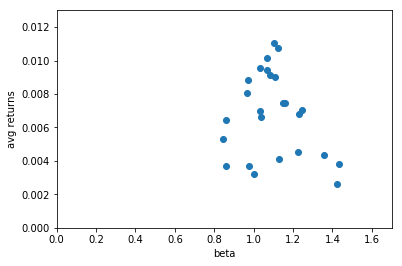

In [33]:
CAPM=pd.DataFrame([],index=Data.drop('MKT',axis=1).columns,columns=['avg','alpha','talpha','beta','tbeta'])
CAPM['avg']=Data.drop('MKT',axis=1).mean()

for i in CAPM.index:
    x=sm.add_constant(Data['MKT'])
    y=Data[i]
    results=sm.OLS(y,x).fit()
    CAPM.at[i,'alpha']=results.params[0]
    CAPM.at[i,'beta']=results.params[1]
    CAPM.at[i,'talpha']=results.params[0]/results.HC0_se[0]
    CAPM.at[i,'tbeta']=results.params[1]/results.HC0_se[1]
 
plt.scatter(x=CAPM['beta'],y=CAPM['avg'])
plt.axis([0,1.7,0,0.013])
plt.xlabel('beta')
plt.ylabel('avg returns')

- This pattern is inconsistent!
- If CAPM holds, the scatter plot should be in a straight line
- Betas and excess returns do not line up!

### 6.5 - Test FFM Three-Factor Model

In [34]:
url = "https://www.dropbox.com/s/9346pp2iu5prv8s/MonthlyFactors.csv?dl=1"
Factors = pd.read_csv(url,index_col=0, parse_dates=True,na_values=-99)
Factors=Factors/100
# keep only market and RF
Factors=Factors.iloc[:,2:4]
Factors.head()

,SMB,HML
Date,,
1926-07-31,-0.0230,-0.0287
1926-08-31,-0.0140,0.0419
1926-09-30,-0.0132,0.0001
1926-10-31,0.0004,0.0051
1926-11-30,-0.0020,-0.0035


In [35]:
Data=pd.merge(Data,Factors,left_index=True,right_index=True)
Data.mean()

SMALL LoBM    0.002614
ME1 BM2       0.007029
ME1 BM3       0.007457
ME1 BM4       0.009406
SMALL HiBM    0.011049
ME2 BM1       0.003798
ME2 BM2       0.006775
ME2 BM3       0.009002
ME2 BM4       0.009580
ME2 BM5       0.010746
ME3 BM1       0.004335
ME3 BM2       0.007439
ME3 BM3       0.006954
ME3 BM4       0.008864
ME3 BM5       0.010142
ME4 BM1       0.004548
ME4 BM2       0.004114
ME4 BM3       0.006618
ME4 BM4       0.008032
ME4 BM5       0.009139
BIG LoBM      0.003232
ME5 BM2       0.003706
ME5 BM3       0.003705
ME5 BM4       0.005321
BIG HiBM      0.006471
MKT           0.004199
SMB           0.002835
HML           0.004681
dtype: float64

In [36]:
FF3=pd.DataFrame([],index=Data.drop(['MKT','HML','SMB'],axis=1).columns,columns=['avg','alpha','talpha',
                'betamkt','tbetamkt','betahml','tbetahml','betasmb','tbetasmb'])
# create dataframe to store residual
FF3Resid=Data.drop(['MKT','SMB','HML'],axis=1).copy()
#store avg return
FF3['avg']=Data.drop(['MKT','SMB','HML'],axis=1).mean()

for i in FF3.index:
    y=Data[i]
    x=sm.add_constant(Data[['MKT','HML','SMB']])
    results=sm.OLS(y,x).fit()
    FF3.at[i,['alpha','betamkt','betahml','betasmb']]=results.params.values
    #Collectively store values into dataframe
    FF3.at[i,['talpha','tbetamkt','tbetahml','tbetasmb']]=(results.params/results.HC0_se).values
    #Collectively perform calculation to store values into dataframe (calculation are done element by element)
FF3

,avg,alpha,talpha,betamkt,tbetamkt,betahml,tbetahml,betasmb,tbetasmb
SMALL LoBM,0.002614,-0.00440838,-4.24507,1.03,40.2504,-0.287674,-6.05266,1.42646,32.0689
ME1 BM2,0.007029,-0.00113688,-1.49452,0.967854,47.7795,0.0973595,2.67459,1.28597,39.2601
ME1 BM3,0.007457,-0.000898863,-1.43025,0.933751,55.9214,0.24922,9.64519,1.15286,43.3798
ME1 BM4,0.009406,0.000705453,1.19192,0.888116,53.5106,0.38721,14.9591,1.11405,44.1647
SMALL HiBM,0.011049,0.000688285,1.09588,0.953117,48.5083,0.631118,17.8301,1.20067,40.4668
ME2 BM1,0.003798,-0.00144223,-1.83441,1.09698,51.1651,-0.476837,-12.7491,1.01091,25.9593
ME2 BM2,0.006775,-0.000221304,-0.328608,1.01726,55.0646,0.0218268,0.712527,0.924991,27.8746
ME2 BM3,0.009002,0.0015253,2.36056,0.961246,54.2168,0.229569,7.88008,0.834472,33.5082
ME2 BM4,0.009580,0.00130674,2.18343,0.967862,56.6039,0.472115,16.7163,0.704971,29.8176
ME2 BM5,0.010746,0.000585048,0.896452,1.06895,59.2525,0.69711,25.3791,0.849794,38.4554


In [37]:
%matplotlib inline

Text(0.5,0.92,'alpha FF3')

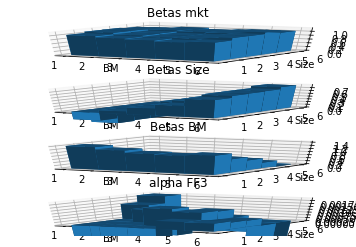

In [38]:
fig = plt.figure()
ax = fig.add_subplot(411, projection='3d')
top = FF3.betamkt
bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(BM,Size, bottom, width, depth, top)
plt.xlabel('BM')
plt.ylabel('Size')
ax.set_title('Betas mkt')

ax = fig.add_subplot(412, projection='3d')
top = FF3.betahml
bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(BM,Size, bottom, width, depth, top)
plt.xlabel('BM')
plt.ylabel('Size')
ax.set_title('Betas Size')

ax = fig.add_subplot(413, projection='3d')
top = FF3.betasmb
bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(BM,Size, bottom, width, depth, top)
plt.xlabel('BM')
plt.ylabel('Size')
ax.set_title('Betas BM')

ax = fig.add_subplot(414, projection='3d')
top = FF3.alpha
bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(BM,Size, bottom, width, depth, top)
plt.xlabel('BM')
plt.ylabel('Size')
ax.set_title('alpha FF3')

In [ ]:
Starting from last question plotting